<a href="https://colab.research.google.com/github/PhamBaVuong/MachineLearning/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes

In [5]:
from google.colab import files
uploaded = files.upload()

Saving chieucao-cannang.txt to chieucao-cannang.txt


01

In [ ]:
import math
from sklearn.naive_bayes import MultinomialNB
import numpy as np
e1 = [2, 1, 2, 2, 2, 2] # Nhập dữ liệu của tập huấn luyện (dữ liệu đầu vào)
e2 = [2, 2, 2, 1, 2, 2]
e3 = [2, 2, 2, 2, 2, 2]
e4 = [0, 0, 1, 0, 2, 1]
train_data = np.array([e1, e2, e3, e4]) # Tạo tập huấn luyện dựa trên dữ liệu đã tạo
ket_qua = np.array(['Y', 'Y', 'Y', 'N'])    # Nhập kết quả của tập huấn luyện (dữ liệu đầu vào)
e5 = np.array([[1, 1, 2, 1, 2, 1]]) # Tạo dữ liệu mới cần dự đoán (test)
ml = MultinomialNB(alpha = 1)
ml.fit(train_data, ket_qua) # Huấn luyện tập mới dự trên dữ liệu và kết quả của tập huấn luyện
print ('Probability of e5 :', ml.predict_proba(e5)) # Dự đoán xác suất của tập mới (dữ liệu đầu ra)
print ('Predicting class of e5 :', str(ml.predict(e5)[0]))  # Dự đoán kết quả của tập mới (dữ liệu đầu ra)

Probability of e5 : [[0.27079929 0.72920071]]
Predicting class of e5 : Y


02

In [1]:
# Tí­nh P(A|B) theo P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    # Tí­nh P(not A)
    not_a = 1 - p_a
    # Tí­nh P(B)
    p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
    # Tí­nh P(A|B)
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b

p_a = 0.0002
p_b_given_a = 0.85
p_b_given_not_a = 0.05

result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)

print ('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


03

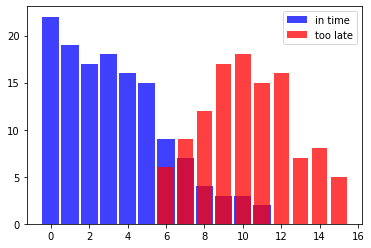

-1 0
0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 0.6
7 0.4375
8 0.25
9 0.15
10 0.14285714285714285
11 0.11764705882352941
12 0


In [2]:
import math
import matplotlib.pyplot as plt

in_time = [(0, 22), (1, 19), (2, 17), (3, 18), (4, 16), (5, 15), (6, 9), (7, 7), (8, 4), (9, 3), (10, 3), (11, 2)]
too_late = [(6, 6), (7, 9), (8, 12), (9, 17), (10, 18), (11, 15), (12, 16), (13, 7), (14, 8), (15, 5)]

X, Y = zip(*in_time)
X2, Y2 = zip(*too_late)

bar_width = 0.9
plt.bar(X, Y, bar_width, color = 'blue', alpha = 0.75, label = 'in time')
bar_width = 0.8
plt.bar(X2, Y2, bar_width, color = 'red', alpha = 0.75, label = 'too late')

plt.legend(loc = 'upper right')
plt.show()

in_time_dict = dict(in_time)
too_late_dict = dict(too_late)

def catch_the_train(min):
    s = in_time_dict.get(min, 0)
    if s == 0:
        return 0
    else:
        m = too_late_dict.get(min, 0)
        return s / (s + m)

for minutes in range(-1, 13):
    print (minutes, catch_the_train(minutes))

04

In [11]:
import matplotlib.pyplot as plt
import numpy as np
genders = ['male', 'female']
persons = []
with open (uploaded['chieucao-cannang.txt']) as fh:
    for line in fh:
        persons.append(line.strip().split())

firstnames = {}
heights = {}

for gender in genders:
    firstnames[gender] = [ x[0] for x in persons if x[4] == gender]
    heights[gender] = [ x[2] for x in persons if x[4] == gender]
    heights[gender] = np.array(heights[gender], np.int)

for gender in ('female', 'male'):
    print (gender + ':')
    print (firstnames[gender][:10])
    print (heights[gender][:10])

from collections import Counter
# import numpy as np
class Feature:
    
    def __init__(self, data, name = None, bin_width = None):
        self.name = name
        self.bin_width = bin_width
        if bin_width:
            self.min, self.max = min(data), max(data)
            bins = np.arange((self.min // bin_width) * bin_width, (self.max // bin_width) * bin_width, bin_width)
            freq, bins = np.histogram(data, bins)
            self.freq_dict = dict(zip(bins, freq))
            self.freq_sum = sum(self.freq_dict.values())

    def frequency(self, value):
        if self.bin_width:
            value = (value // self.bin_width) * self.bin_width
        if value in self.freq_dict:
            return self.freq_dict[value]
        else:
            return 0

fts = {}
for gender in genders:
    fts[gender] = Feature(heights[gender], name = gender, bin_width = 5)
    print (gender, fts[gender].freq_dict)

for gender in genders:
    frequencies = list(fts[gender].freq_dict.items())
    frequencies.sort(key = lambda x: x[1])
    X, Y = zip(*frequencies)
    color = 'blue' if gender == 'male' else 'red'
    bar_width = 4 if gender == 'male' else 3
    plt.bar(X, Y, bar_width, color = color, alpha = 0.75, label = gender)

plt.legend(loc = 'upper right')
plt.show()

class NBclass:
    
    def __init__(self, name, *features):
        self.features = features
        self.name = name
    
    def probability_value_given_feature(self, feature_value, feature):
        if feature.freq_sum == 0:
            return 0
        else:
            return feature.frequency(feature_value) / feature.freq_sum

cls = {}
for gender in genders:
    cls[gender] = NBclass(gender, fts[gender])

class Classifier:
    
    def __init__(self, *nbclasses):
        self.nbclasses = nbclasses
    
    def prob(self, *d, best_only = True):
        nbclasses = self.nbclasses
        probability_list = []
        for nbclass in nbclasses:
            ftrs = nbclass.features
            prob = 1
            for i in range(len(ftrs)):
                prob *= nbclass.probability_value_given_feature(d[i], ftrs[i])
            probability_list.append((prob, nbclass.name))
        
        prob_values = [f[0] for f in probability_list]
        prob_sum = sum(prob_values)
        if prob_sum == 0:
            number_classes = len(self.nbclasses)
            pl = []
            for prob_element in probability_list:
                pl.append(((1 / number_classes), prob_element[1]))
            probability_list = pl
        else:
            probability_list = [(p[0] / prob_sum, p[1]) for p in probability_list]
        if best_only:
            return max(probability_list)
        else:
            return probability_list

c = Classifier(cls['male'], cls['female'])
for i in range(130, 220, 5):
    print (i, c.prob(i, best_only = False))

OSError: ignored

05

In [12]:
import numpy as np
def prepare_person_dataset(fname):
    genders = ['male', 'female']
    persons = []
    with open(fname) as fh:
        for line in fh:
            persons.append(line.strip().split())
    
    firstnames = []
    dataset = []
    for person in persons:
        firstnames.append((person[0], person[4]))
        height_weight = (float(person[2]), float(person[3]))
        dataset.append((height_weight, person[4]))
    return dataset

learnset = prepare_person_dataset(uploaded['chieucao-cannang.txt'])
print (learnset)

OSError: ignored